In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv('../titanic/test.csv')

train_x=train.drop(['Survived'],axis=1)
train_y=train['Survived']
test_x=test.copy()


#特徴量生成
train_x['Family_Size']=train_x['SibSp']+train_x['Parch']+1
test_x['Family_Size']=test_x['SibSp']+test_x['Parch']+1

train_x['Alone']=0
test_x['Alone']=0
train_x.loc[train_x.Family_Size==1,'Alone']=1
test_x.loc[test_x.Family_Size==1,'Alone']=1


# カテゴリ変数にLabel Encodeing
for c in['Sex','Embarked']:
    le=LabelEncoder()
    le.fit(train_x[c].fillna('NA'))
    
    train_x[c]=le.transform(train_x[c].fillna('NA'))
    test_x[c]=le.transform(test_x[c].fillna('NA'))
train_x.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3,2,0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3,1,1


In [149]:
honorific_arr = []

for row in range(0,len(train_x)):
    if train_x['Name'][row].lower().find('mr.') > -1 or train_x['Name'][row].lower().find('mr ') > -1:
        honorific_arr.append(0)
        pass
    elif train_x['Name'][row].lower().find('mrs.') > -1 or train_x['Name'][row].lower().find('mrs ') > -1:
        honorific_arr.append(1)
        pass
    elif train_x['Name'][row].lower().find('miss.') > -1 or train_x['Name'][row].lower().find('miss ') > -1:
        honorific_arr.append(2)
        pass
    elif train_x['Name'][row].lower().find('master.') > -1 or train_x['Name'][row].lower().find('master ') > -1:
        honorific_arr.append(3)
        pass
    else:
        honorific_arr.append(4)
train_x['Honorific'] = honorific_arr

honorific_arr = []
for row in range(0,len(test_x)):
    if test_x['Name'][row].lower().find('mr.') > -1 or test_x['Name'][row].lower().find('mr ') > -1:
        honorific_arr.append(0)
        pass
    elif test_x['Name'][row].lower().find('mrs.') > -1 or test_x['Name'][row].lower().find('mrs ') > -1:
        honorific_arr.append(1)
        pass
    elif test_x['Name'][row].lower().find('miss.') > -1 or test_x['Name'][row].lower().find('miss ') > -1:
        honorific_arr.append(2)
        pass
    elif test_x['Name'][row].lower().find('master.') > -1 or test_x['Name'][row].lower().find('master ') > -1:
        honorific_arr.append(3)
        pass
    else:
        honorific_arr.append(4)
test_x['Honorific'] = honorific_arr



In [136]:
test_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Honorific
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,3,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,1,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,3,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,3,3,0,1


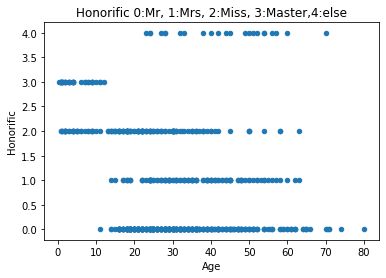

In [161]:
ah = pd.concat([train_x["Age"],train_x["Honorific"]],axis=1)
ah = ah.dropna()
ah.plot(x="Age",y="Honorific",kind="scatter")
plt.title("Honorific 0:Mr, 1:Mrs, 2:Miss, 3:Master,4:else")
plt.xlabel("Age")
plt.ylabel("Honorific")
plt.show()

age_mean_h0 = ah[ah['Honorific'] == 0]['Age'].mean()
age_mean_h1 = ah[ah['Honorific'] == 1]['Age'].mean()
age_mean_h2 = ah[ah['Honorific'] == 2]['Age'].mean()
age_mean_h3 = ah[ah['Honorific'] == 3]['Age'].mean()
age_mean_h4 = ah[ah['Honorific'] == 4]['Age'].mean()
age_mean_h = ah['Age'].mean()

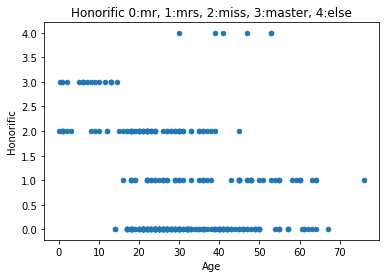

In [165]:
ah = pd.concat([test_x["Age"],test_x["Honorific"]],axis=1)
ah = ah.dropna()
ah.plot(x="Age",y="Honorific",kind="scatter")
plt.title("Honorific 0:mr, 1:mrs, 2:miss, 3:master, 4:else")
plt.xlabel("Age")
plt.ylabel("Honorific")
plt.show()

age_mean_h0 = ah[ah['Honorific'] == 0]['Age'].mean()
age_mean_h1 = ah[ah['Honorific'] == 1]['Age'].mean()
age_mean_h2 = ah[ah['Honorific'] == 2]['Age'].mean()
age_mean_h3 = ah[ah['Honorific'] == 3]['Age'].mean()
age_mean_h4 = ah[ah['Honorific'] == 4]['Age'].mean()
age_mean_h = ah['Age'].mean()

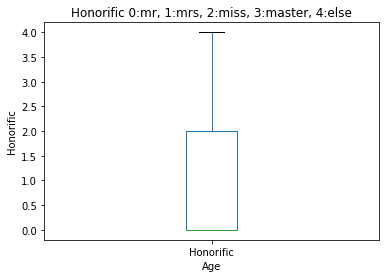

In [167]:
a = pd.concat([test_x["Age"],test_x["Honorific"]],axis=1)
a= a.dropna()
ah.plot(x="Age",y="Honorific",kind="box")
plt.title("Honorific 0:mr, 1:mrs, 2:miss, 3:master, 4:else")
plt.xlabel("Age")
plt.ylabel("Honorific")
plt.show()

In [139]:
age_2 = []
for row in range(0,len(train_x)):
    if train_x['Age'][row] > 0:
        age_2.append(train_x['Age'][row])
        pass
    else:
        if train_x['Honorific'][row] == 0:
            age_2.append(age_mean_h0)
        elif train_x['Honorific'][row] == 1:
            age_2.append(age_mean_h1)
        elif train_x['Honorific'][row] == 2:
            age_2.append(age_mean_h2)
        elif train_x['Honorific'][row] == 3:
            age_2.append(age_mean_h3)
        elif train_x['Honorific'][row] == 4:
            age_2.append(age_mean_h4)
        else:
            age_2.append(age_mean_h)
train_x['Age_2'] = age_2

age_2 = []
for row in range(0,len(test_x)):
    if test_x['Age'][row] > 0:
        age_2.append(test_x['Age'][row])
        pass
    else:
        if test_x['Honorific'][row] == 0:
            age_2.append(age_mean_h0)
        elif test_x['Honorific'][row] == 1:
            age_2.append(age_mean_h1)
        elif test_x['Honorific'][row] == 2:
            age_2.append(age_mean_h2)
        elif test_x['Honorific'][row] == 3:
            age_2.append(age_mean_h3)
        elif test_x['Honorific'][row] == 4:
            age_2.append(age_mean_h4)
        else:
            age_2.append(age_mean_h)
test_x['Age_2'] = age_2

In [140]:
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Honorific,Age_2
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3,2,0,0,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,0,1,38.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,1,1,2,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3,2,0,1,35.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3,1,1,0,35.0


In [141]:
# 変数を除外
train_x=train_x.drop(['PassengerId','Name','Ticket','Cabin','Parch','Honorific','Age','SibSp'],axis=1)
test_x=test_x.drop(['PassengerId','Name','Ticket','Cabin','Parch','Honorific','Age','SibSp'],axis=1)

In [142]:
# モデル生成GBDT
from xgboost import XGBClassifier

model=XGBClassifier(n_estimators=20, random_state=71,max_depth=5,min_child_weight=3)
model.fit(train_x,train_y)

# テストデータの予測値を確率で出力
pred=model.predict_proba(test_x)[:,1]

#予測値を二値変換
pred_label=np.where(pred>0.5,1,0)
#提出用ファイル作成
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_label})
submission.to_csv('submission_first.csv',index=False)

from sklearn.metrics import log_loss,accuracy_score
from sklearn.model_selection import KFold

# 各Foldのスコアを保存するリスト
scores_accuracy=[]
scores_logloss

# クロスバリデーション，学習データを四分割

kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分割
    tr_x, va_x=train_x.iloc[tr_idx],train_x.iloc[va_idx]
    tr_y, va_y=train_y.iloc[tr_idx],train_y.iloc[va_idx]
    
    # モデルの学習
    model=XGBClassifier(n_estimators=20,random_state=71)
    model.fit(tr_x,tr_y)
    
    # バリデーションデータの予測値を確率で出力する
    va_pred=model.predict_proba(va_x)[:,1]
    
    #バリデーションデータのスコアを計算する
    logloss=log_loss(va_y,va_pred)
    accuracy=accuracy_score(va_y,va_pred>0.5)
    
    #バリデーションデータでのスコアを保存
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各Foldのスコアの平均を出力
logloss=np.mean(scores_logloss)
accuracy=np.mean(scores_accuracy)
print(f'logloss:{logloss:.4f},accuracy:{accuracy:.4f}')


logloss:0.4192,accuracy:0.8238


In [143]:
import itertools

#チューニング候補とするパラメータを準備する
param_space={
    'max_depth':[1,3,5,7,9],
    'min_child_weight':[1.0,2.0,3.0,4.0]
}

#探索するハイパーパラメータの組み合わせ
param_combinations=itertools.product(param_space['max_depth'],param_space["min_child_weight"])

#各パラメータの組み合わせ，それに対するスコアを保存するリスト
params=[]
scores=[]

#各パラメータの組み合わせごとに，クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:
        score_folds=[]
        
        #クロスバリデーション４分割
        kf=KFold(n_splits=4,shuffle=True,random_state=123456)
        for tr_idx, va_idx in kf.split(train_x):
            #学習データを学習データとバリデーションデータに分ける
            tr_x, va_x = train_x.iloc[tr_idx],train_x.iloc[va_idx]
            tr_y, va_y = train_y.iloc[tr_idx],train_y.iloc[va_idx]
            
            #モデルの学習
            model = XGBClassifier(n_estimators=20,random_state=71,
                                 max_depth=max_depth,min_child_weight=min_child_weight)
            model.fit(tr_x,tr_y)
            
            #バリデーションデータでのスコアを計算し，保存する
            va_pred=model.predict_proba(va_x)[:,1]
            logloss=log_loss(va_y,va_pred)
            score_folds.append(logloss)
        
        #各foldのスコアを平均する
        score_mean=np.mean(score_folds)
        
        #パラメータの組み合わせ，それに対するスコアを保存する
        params.append((max_depth,min_child_weight))
        scores.append(score_mean)

#最もスコアがいいものをベストなパラメータとする
best_idx=np.argsort(scores)[0]
best_param=params[best_idx]
print(f'max_depth:{best_param[0]},min_child_weight: {best_param[1]}')


max_depth:5,min_child_weight: 3.0


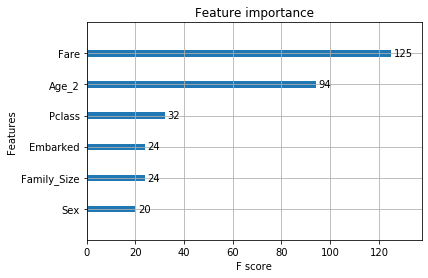

In [144]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model)
pyplot.show()